In [ ]:
!wget -c https://archive.ics.uci.edu/static/public/1/abalone.zip

--2025-02-03 06:58:57--  https://archive.ics.uci.edu/static/public/1/abalone.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.zip’

abalone.zip             [ <=>                ]  54.06K  --.-KB/s    in 0.1s    

2025-02-03 06:58:58 (453 KB/s) - ‘abalone.zip’ saved [55357]



In [ ]:
!unzip abalone.zip

Archive:  abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


In [ ]:
!head abalone.data

M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19


In [ ]:
!pip install torchview

#Подключаем библиотеки

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import torch.nn.functional as F

#Чтение данных

In [30]:
data = pd.read_csv('abalone.data',
                   header=None,
                   names=['c'+str(i) for i in range(9)])
data.head()
Y = data.c8.to_numpy()
print(Y)
dataX = data.drop('c8', axis=1)
print(dataX)

[15  7  9 ...  9 10 12]
     c0     c1     c2     c3      c4      c5      c6      c7
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550
...  ..    ...    ...    ...     ...     ...     ...     ...
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950

[4177 rows x 8 columns]


#Кодируем метки

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataX['lable'] = le.fit_transform(dataX['c0'].values)
print(dataX)

     c0     c1     c2     c3      c4      c5      c6      c7  lable
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500      2
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700      2
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100      0
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550      2
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550      1
...  ..    ...    ...    ...     ...     ...     ...     ...    ...
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490      0
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605      2
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080      2
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960      0
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950      2

[4177 rows x 9 columns]


In [32]:
dataX = dataX.drop('c0', axis=1)
X = dataX.to_numpy()

#Построение модели для классификации

In [42]:
class AbaloneRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7+3, 10)
        self.emb = nn.Embedding(3, 3)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 20)
        self.act2 = nn.ReLU()
        self.solver = nn.Linear(20, 1)

    def forward(self, x):
        x, catx = torch.split(x, 7, dim=1)
        y = self.emb(catx.to(torch.int))[:,0]
        x = torch.cat([x,y], dim=-1)
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.solver(x)
        return x

model = AbaloneRegressor()
model

AbaloneRegressor(
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (emb): Embedding(3, 3)
  (act1): ReLU()
  (fc2): Linear(in_features=10, out_features=20, bias=True)
  (act2): ReLU()
  (solver): Linear(in_features=20, out_features=1, bias=True)
)

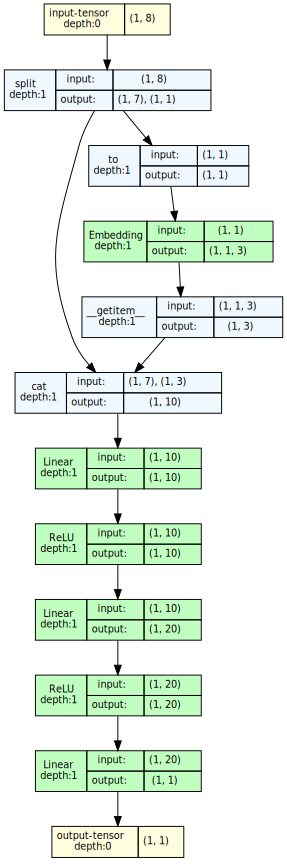

In [43]:
from torchview import draw_graph

model_graph = draw_graph(model, input_size=(1, 8), expand_nested=True)
model_graph.visual_graph

In [37]:
idx = np.array(range(X.shape[0]))
np.random.shuffle(idx)
pos1, pos2 = idx.shape[0]*3//5, idx.shape[0]*4//5
Xtr, Xval, Xtest = X[idx[:pos1]], X[idx[pos1:pos2]], X[idx[pos2:]]
Ytr, Yval, Ytest = Y[idx[:pos1]], Y[idx[pos1:pos2]], Y[idx[pos2:]]
print(Xtr.shape, Xval.shape, Xtest.shape)

(2506, 8) (835, 8) (836, 8)


In [38]:
Xtr_t = torch.tensor(Xtr, dtype=torch.float32)
Ytr_t = torch.tensor(Ytr, dtype=torch.float32).reshape(-1, 1)

Xval_t = torch.tensor(Xval, dtype=torch.float32)
Yval_t = torch.tensor(Yval, dtype=torch.float32).reshape(-1, 1)

Xtest_t = torch.tensor(Xtest, dtype=torch.float32)
Ytest_t = torch.tensor(Ytest, dtype=torch.float32).reshape(-1, 1)

In [44]:
loss_fn = nn.L1Loss()  # binary cross entropy
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

n_epochs = 1000
batch_size = 64
patience=10
best_epoch,old_loss=0,1e100
for epoch in range(n_epochs):
    for i in range(0, len(Xtr), batch_size):
        Xbatch = Xtr_t[i:i+batch_size]
        y_pred = model(Xbatch)

        ybatch = Ytr_t[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    Yp = model(Xval_t)
    loss = loss_fn(Yval_t, Yp)
    if loss<old_loss:
            best_epoch=epoch
            old_loss=loss
            best_model=model
    if epoch>best_epoch+patience:
            break

    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 6.415813446044922
Finished epoch 1, latest loss 1.939443588256836
Finished epoch 2, latest loss 1.8621748685836792
Finished epoch 3, latest loss 1.830888032913208
Finished epoch 4, latest loss 1.8092085123062134
Finished epoch 5, latest loss 1.7922825813293457
Finished epoch 6, latest loss 1.7793259620666504
Finished epoch 7, latest loss 1.7687557935714722
Finished epoch 8, latest loss 1.7602640390396118
Finished epoch 9, latest loss 1.7519934177398682
Finished epoch 10, latest loss 1.7460823059082031
Finished epoch 11, latest loss 1.7399694919586182
Finished epoch 12, latest loss 1.7355674505233765
Finished epoch 13, latest loss 1.733098030090332
Finished epoch 14, latest loss 1.7295223474502563
Finished epoch 15, latest loss 1.727034091949463
Finished epoch 16, latest loss 1.7202049493789673
Finished epoch 17, latest loss 1.7171845436096191
Finished epoch 18, latest loss 1.7145787477493286
Finished epoch 19, latest loss 1.7095707654953003
Finished epoch 

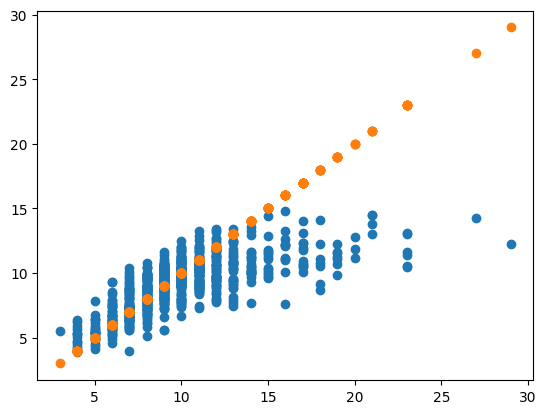

In [45]:
import matplotlib.pyplot as pp
Yp = best_model(Xtest_t).detach().numpy()
pp.scatter(Ytest_t, Yp)
pp.scatter(Ytest_t, Ytest_t)